In [1]:
!gdown https://drive.google.com/uc?id=1kCQxmbJzZPyoyt10H4QAqAUZFhqNZuZG
!unzip YouTubeFaces-subset.zip
!mv subset/* ./
!ls -l

Downloading...
From: https://drive.google.com/uc?id=1kCQxmbJzZPyoyt10H4QAqAUZFhqNZuZG
To: /content/YouTubeFaces-subset.zip
100% 496M/496M [00:06<00:00, 77.3MB/s]
Archive:  YouTubeFaces-subset.zip
   creating: subset/
 extracting: subset/Fred_Eckhard_1.npz  
 extracting: subset/Kevin_Spacey_3.npz  
 extracting: subset/Amanda_Beard_2.npz  
 extracting: subset/Barbara_Brezigar_2.npz  
 extracting: subset/Daniel_Kurtzer_2.npz  
 extracting: subset/Kevin_Spacey_2.npz  
 extracting: subset/Fred_Eckhard_2.npz  
 extracting: subset/Lauren_Hutton_3.npz  
 extracting: subset/Amanda_Beard_0.npz  
 extracting: subset/Daniel_Kurtzer_1.npz  
 extracting: subset/Alison_Lohman_5.npz  
 extracting: subset/Andrew_Bernard_2.npz  
 extracting: subset/Robert_F_Kennedy_Jr_0.npz  
 extracting: subset/Daniel_Kurtzer_3.npz  
 extracting: subset/Daniel_Kurtzer_0.npz  
 extracting: subset/Robert_F_Kennedy_Jr_4.npz  
 extracting: subset/Elizabeth_Berkeley_2.npz  
 extracting: subset/Amanda_Beard_4.npz  
 extracti

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df = pd.read_csv('youtube_faces_with_keypoints_full.csv')
df

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
5,Alison_Lohman_5,Alison_Lohman,227.0,179.0,68.0,105.647059,6.0
6,Kevin_Spacey_0,Kevin_Spacey,196.0,264.0,91.0,99.912088,6.0
7,Kevin_Spacey_1,Kevin_Spacey,260.0,217.0,59.0,120.186441,6.0
8,Kevin_Spacey_2,Kevin_Spacey,186.0,175.0,71.0,86.746479,6.0
9,Kevin_Spacey_3,Kevin_Spacey,100.0,89.0,99.0,44.636364,6.0


In [4]:
class IndexMathsTest:
  def __init__(self, base_len = 17, anchor_set_len = 1, positive_set_len = 1, negative_set_len = 1):
    self.base_len = base_len
    self.anchor_set_len = anchor_set_len
    self.positive_set_len = positive_set_len
    self.negative_set_len = negative_set_len

  def __len__(self):
    return self.base_len * self.anchor_set_len * self.positive_set_len * self.negative_set_len

  def __getitem__(self, index):
    negative_i = index % self.negative_set_len
    positive_i = (index // self.negative_set_len) % self.positive_set_len
    anchor_i = (index // self.negative_set_len // self.positive_set_len) % self.anchor_set_len
    base_i = index // self.negative_set_len // self.positive_set_len // self.anchor_set_len
    return (base_i, anchor_i, positive_i, negative_i)

t = IndexMathsTest(17, 10, 10, 10)
len(t), t[10231]

(17000, (10, 2, 3, 1))

In [5]:
class NormalizeTransform:
  def __call__(self, img, lms):
    return img

In [6]:
import torch
import os

In [7]:
import random
import joblib
import pickle

class YouTubeFacesDataset(torch.utils.data.Dataset):
  def __init__(self, df, folder = '.', transform = NormalizeTransform(),
               cache_lim = 200,
               preload = False, preprocess = False,
               anchor_set_len = 1, positive_set_len = 1, negative_set_len = 1,
               stochastic_set_fraction = 0.8):
    self.transform = transform
    self.cache = {}
    self.cache_lim = 0 if preload else cache_lim
    self.preprocessed_cache = {}
    self.data = {}
    for p in tqdm(df['personName'].unique(), desc='Loading data'):
      self.data[p] = []
      for fn, cnt in df[df['personName'] == p][['videoID', 'videoDuration']].values:
        fp = f'{folder}/{fn}.npz'
        cnt = int(cnt)
        self.data[p] += [(fp, i) for i in range(cnt)]
        if preload:
          self.cache_lim += 1
          imgs, lms = self._cache_get(fp)
          assert imgs.shape[-1] == cnt
          assert lms.shape[-1] == cnt
        if preprocess:
          self.preprocessed_cache[fp] = None
    if preprocess:
      preprocessed = joblib.Parallel(n_jobs=-1, verbose=0, backend='multiprocessing')(
        joblib.delayed(YouTubeFacesDataset_preprocess)(fp) for fp in tqdm(self.preprocessed_cache.keys(), desc='Preprocessing'))
      self.preprocessed_cache = dict((fp, self._load_preprocessed(pfp)) for fp, pfp in tqdm(preprocessed, desc='Loading data'))
    self.persons = list(self.data.keys())
    self.neg_data = {}
    for p in self.persons:
      self.neg_data[p] = []
      for p_neg in self.persons:
        if p_neg == p:
          continue
        self.neg_data[p] += self.data[p_neg]
    self.anchor_set_len = anchor_set_len
    self.positive_set_len = positive_set_len
    self.negative_set_len = negative_set_len
    self.stochastic_set_fraction = stochastic_set_fraction
  
  def __len__(self):
    return len(self.persons) * self.anchor_set_len * self.positive_set_len * self.negative_set_len
  
  def __getitem__(self, index):
    p_i = index // self.negative_set_len // self.positive_set_len // self.anchor_set_len
    assert p_i >= 0
    assert p_i < len(self.persons)
    p = self.persons[p_i]
    if self.negative_set_len > len(self.neg_data[p]) * self.stochastic_set_fraction:
      negative_i = index % self.negative_set_len
      negative_i = negative_i % len(self.neg_data[p])
    else:
      negative_i = random.randint(0, len(self.neg_data[p]) - 1)
    assert negative_i >= 0
    assert negative_i < len(self.neg_data[p])
    if self.positive_set_len > len(self.data[p]) * self.stochastic_set_fraction:
      positive_i = (index // self.negative_set_len) % self.positive_set_len
      positive_i = positive_i % len(self.data[p])
    else:
      positive_i = random.randint(0, len(self.data[p]) - 1)
    assert positive_i >= 0
    assert positive_i < len(self.data[p])
    if self.anchor_set_len > len(self.data[p]) * self.stochastic_set_fraction:
      anchor_i = (index // self.negative_set_len // self.positive_set_len) % self.anchor_set_len
      anchor_i = anchor_i % len(self.data[p])
    else:
      anchor_i = random.randint(0, len(self.data[p]) - 1)
    assert anchor_i >= 0
    assert anchor_i < len(self.data[p])
    return self._load(*self.data[p][anchor_i]), self._load(*self.data[p][positive_i]), self._load(*self.neg_data[p][negative_i])
  
  def _load(self, fp, i):
    if fp in self.preprocessed_cache:
      assert i < len(self.preprocessed_cache[fp]), (fp, i, len(self.preprocessed_cache[fp]))
      if self.preprocessed_cache[fp][i] is not None:
        return self.preprocessed_cache[fp][i]
    imgs, lms = self._cache_get(fp)
    assert i < imgs.shape[-1], (fp, i, imgs.shape[-1])
    data = imgs[:,:,:,i]
    assert i < lms.shape[-1], (fp, i, lms.shape[-1])
    lms = lms[:,:,i]
    if self.transform:
      data = self.transform(data, lms)
    return data
  
  def _cache_get(self, fp):
    if fp in self.cache:
      return self.cache[fp]
    if len(self.cache) > self.cache_lim:
      idx = random.randint(0, len(self.cache) - 1)
      key = list(self.cache.keys())[idx]
      del self.cache[key]
    d = np.load(fp)
    # trigger lazy loading
    self.cache[fp] = (d['colorImages'], d['landmarks2D'])
    return self.cache[fp]
  
  def _preprocess(self, fp):
    imgs, lms = self._cache_get(fp)
    pfp = f'{fp}.pkl'
    if not os.path.exists(pfp):
      d = [self._load(fp, i) for i in range(imgs.shape[-1])]
      with open(pfp, 'wb') as f:
        pickle.dump(d, f)
    return (fp, pfp)
  
  def _load_preprocessed(self, pfp):
    with open(pfp, 'rb') as f:
      return pickle.load(f)

# reduce serialization data in joblib
def YouTubeFacesDataset_preprocess(fp):
  return dataset._preprocess(fp)

dataset = YouTubeFacesDataset(df, preload=True)
len(dataset)

Loading data: 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


10

In [8]:
test = YouTubeFacesDataset(df, anchor_set_len = 7, positive_set_len = 11, negative_set_len = 17)
len(test), len(test[42]), len(test[0]), len(test[len(test)-1])

Loading data: 100%|██████████| 10/10 [00:00<00:00, 536.90it/s]


(13090, 3, 3, 3)

In [9]:
t = YouTubeFacesDataset(df, preprocess=True)
len(t)

Loading data: 100%|██████████| 54/54 [00:00<00:00, 54.32it/s]


10

In [10]:
t2 = YouTubeFacesDataset(df, preload=True, preprocess=True)
len(t2)

Loading data: 100%|██████████| 54/54 [00:01<00:00, 45.23it/s]


10

In [11]:
d = [x for x in t.preprocessed_cache.values()][0]

In [12]:
import pickle
def pkl(obj, fn):
  with open(fn, 'wb') as f:
    pickle.dump(obj, f)

pkl(d, 'test_data.pkl')
pkl(t._preprocess, 'test_method.pkl')
pkl(pkl, 'test_func.pkl')
pkl(t2._preprocess, 't2_method.pkl')
pkl(test._preprocess, 't3_method.pkl')
!ls -l t*.pkl

-rw-r--r-- 1 root root 1987325945 Sep 26 04:53 t2_method.pkl
-rw-r--r-- 1 root root  149978745 Sep 26 04:53 t3_method.pkl
-rw-r--r-- 1 root root   34980104 Sep 26 04:53 test_data.pkl
-rw-r--r-- 1 root root         19 Sep 26 04:53 test_func.pkl
-rw-r--r-- 1 root root  990316573 Sep 26 04:53 test_method.pkl


In [13]:
test[10000][1].shape

(108, 80, 3)

In [14]:
for i in tqdm(range(len(test))):
  a, p, n = test[i]

100%|██████████| 13090/13090 [00:07<00:00, 1685.17it/s]


In [15]:
cnt = sum(len(x) for x in test.data.values())
cnt

6935

In [16]:
import math

def comb(n, m):
  return int(math.factorial(n) / (math.factorial(m) * math.factorial(n - m)))

comb(3, 2), comb(5, 4)

(3, 5)

In [17]:
# full positive set
total = 0
for imgs in test.data.values():
  cnt_i = len(imgs)
  cnt_rem = cnt - cnt_i
  cnt_posit = comb(cnt_i, 2)
  comb_i = cnt_posit * cnt_rem
  total += comb_i
total

15375721752

In [18]:
# random positive set
total = 0
for imgs in test.data.values():
  cnt_i = len(imgs)
  cnt_rem = cnt - cnt_i
  cnt_posit = 1
  comb_i = cnt_posit * cnt_rem
  total += comb_i
total

62415

In [19]:
len(YouTubeFacesDataset(df, anchor_set_len = 100, positive_set_len = 100, negative_set_len = 100))

Loading data: 100%|██████████| 10/10 [00:00<00:00, 488.12it/s]


10000000

In [20]:
import torchvision
to_pil = torchvision.transforms.ToPILImage()

In [33]:
t = YouTubeFacesDataset(df)
len(t)

Loading data: 100%|██████████| 10/10 [00:00<00:00, 590.75it/s]


10

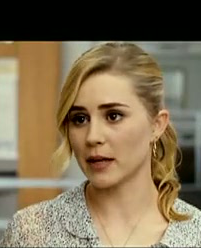

In [22]:
to_pil(t[0][0])

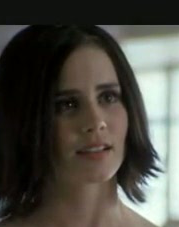

In [23]:
to_pil(t[0][0])

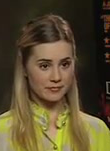

In [35]:
to_pil(t[0][0])

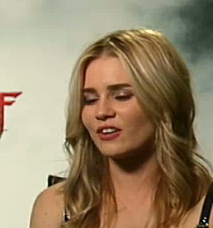

In [25]:
to_pil(t[0][1])

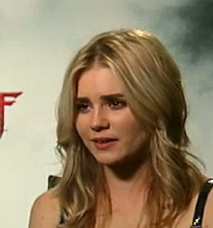

In [36]:
to_pil(t[0][1])

In [26]:
t.persons

['Alison_Lohman',
 'Kevin_Spacey',
 'Lauren_Hutton',
 'Robert_F_Kennedy_Jr',
 'Amanda_Beard',
 'Andrew_Bernard',
 'Barbara_Brezigar',
 'Daniel_Kurtzer',
 'Elizabeth_Berkeley',
 'Fred_Eckhard']

In [27]:
len(t.data[t.persons[0]])

723

In [37]:
t = YouTubeFacesDataset(df, anchor_set_len = 700, positive_set_len = 700, negative_set_len = 1000, preprocess = True)
len(t)

Loading data: 100%|██████████| 54/54 [00:00<00:00, 72.53it/s]


4900000000

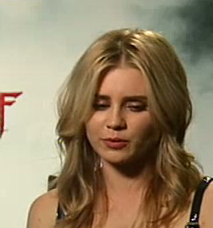

In [29]:
to_pil(t[0][0])

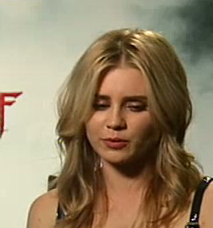

In [30]:
to_pil(t[0][0])

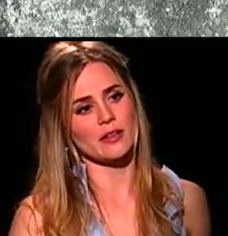

In [31]:
to_pil(t[100000000][1])

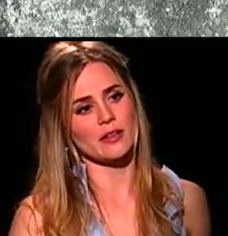

In [39]:
to_pil(t[100000000][1])